# Машинное обучение в бизнесе

### Урок 6. #Задача lookalike (Positive Unlabeled Learning)#

__Домашнее задание__

1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. сделать feature engineering
3. обучить любой классификатор (какой вам нравится)
4. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть
5. применить random negative sampling для построения классификатора в новых условиях
6. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)
7. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

Выполнил ___Соковнин ИЛ___

# <center> Практическое задание </center>

# 1. Задание

взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

### UCI Machine Learning Repository 
 (Center for Machine Learning and Intelligent Systems)

 __Data Set__:<br>
 
 ___in-vehicle coupon recommendation Data Set___<br>
 https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation<br>
 https://archive.ics.uci.edu/ml/machine-learning-databases/00603/

 __Abstract__: This data studies whether a person will accept the coupon recommended to him in different driving scenarios
 
_Эти данные исследуют, примет ли человек рекомендованный ему купон при различных сценариях вождения._

__Data Set Characteristics__: Multivariate<br>
__Number of Instances__: 12684<br>
__Area__: Business<br>
__Attribute Characteristics__: N/A<br>
__Number of Attributes__: 23<br>
__Date Donated__: 2020-09-15<br>
__Associated Tasks__: Classification<br>
__Missing Values?__ Yes<br>
__Number of Web Hits__: 20952

__Source__:

Tong Wang, tong-wang '@' uiowa.edu, University of Iowa<br>
Cynthia Rudin, cynthia '@' cs.duke.edu, Duke University


__Data Set Information__:<br>

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. For more information about the dataset, please refer to the paper:<br>
Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 'A bayesian framework for learning rule sets for interpretable classification.' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.

_Эти данные были собраны с помощью опроса на Amazon Mechanical Turk. Опрос описывает различные сценарии вождения, включая пункт назначения, текущее время, погоду, количество пассажиров и т. Д., А затем спрашивает человека, примет ли он купон, если он является водителем._

__Attribute Information:__

- __destination__: No Urgent Place, Home, Work
- __passanger__: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- __weather__: Sunny, Rainy, Snowy
- __temperature__: 55, 80, 30
- __time__: 2PM, 10AM, 6PM, 7AM, 10PM (14:00, 10:00, 18:00, 7:00, 22:00)
- __coupon__: Restaurant(<\\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
- __expiration__ (срок действия): 1d, 2h (the coupon expires in 1 day or in 2 hours)
- __gender__: Female, Male
- __age__: 21, 46, 26, 31, 41, 50plus, 36, below21
- __maritalStatus__: Unmarried partner, Single, Married partner, Divorced, Widowed (семейное положение: не женат, холост, женат, разведен, вдова)
- __has_Children__: 1, 0
- __education__: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School<br> (Некоторое высшее образование - без степени, степень бакалавра, степень младшего специалиста, выпускник средней школы, высшее образование (степень магистра или доктора), некоторая высшая школа)
- __occupation__:<br>
    Unemployed, Architecture & Engineering, Student,<br>
    Education&Training&Library, Healthcare Support,<br>
    Healthcare Practitioners & Technical, Sales & Related, Management,<br>
    Arts Design Entertainment Sports & Media, Computer & Mathematical,<br>
    Life Physical Social Science, Personal Care & Service,<br>
    Community & Social Services, Office & Administrative Support,<br>
    Construction & Extraction, Legal, Retired,<br>
    Installation Maintenance & Repair, Transportation & Material Moving,<br>
    Business & Financial, Protective Service,<br>
    Food Preparation & Serving Related, Production Occupations,<br>
    Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry<br>
- __income__: \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499,<br>
    \\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
- __Bar__: never, less1, 1\~3, gt8, nan4\~8 (feature meaning: how many times do you go to a bar every month (сколько раз вы ходите в бар каждый месяц?)
- __car__:
- __CoffeeHouse__: never, less1, 4\~8, 1\~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month)?
- __CarryAway__: n4\~8, 1\~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month (сколько раз в месяц вы получаете еду на вынос)?)
- __RestaurantLessThan20__: 4\~8, 1\~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than d20 every month (сколько раз вы ходите в ресторан со средними расходами менее 20 долларов в месяц на человека)?)
- __Restaurant20To50__: 1\~3, less1, never, gt8, 4\~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month?)
- __toCoupon_GEQ15min__: 0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes (расстояние до ресторана / бара для использования купона превышает 15 минут))
- __toCoupon_GEQ25min__: 0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
- __direction_same__: 0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination (находится ли ресторан / бар в том же направлении, что и ваш текущий пункт назначения))
- __direction_opp__: 1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
- __Y__: 1, 0 (whether the coupon is accepted (принят ли купон))

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline

# 2. Визуализация
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

In [2]:
df = pd.read_csv("./UCI Machine Learning Repository/in-vehicle-coupon-recommendation.csv")
df.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1


## Анализ данных

In [3]:
df.shape

(12684, 26)

In [4]:
print('Строк в df:',df.shape[0])  # gives number of row count
print('Столбцов в df:',df.shape[1])  # gives number of col count

Строк в df: 12684
Столбцов в df: 26


In [5]:
df.iloc[0]  # Получаем первую строку (index=0)

destination                      No Urgent Place
passanger                                  Alone
weather                                    Sunny
temperature                                   55
time                                         2PM
coupon                           Restaurant(<20)
expiration                                    1d
gender                                    Female
age                                           21
maritalStatus                  Unmarried partner
has_children                                   1
education               Some college - no degree
occupation                            Unemployed
income                           $37500 - $49999
car                                          NaN
Bar                                        never
CoffeeHouse                                never
CarryAway                                    NaN
RestaurantLessThan20                         4~8
Restaurant20To50                             1~3
toCoupon_GEQ5min    

In [6]:
# Рассмотрим типы признаков
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,12684.0,63.301798,19.154486,30.0,55.0,80.0,80.0,80.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0
toCoupon_GEQ5min,12684.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
toCoupon_GEQ15min,12684.0,0.561495,0.496224,0.0,0.0,1.0,1.0,1.0
toCoupon_GEQ25min,12684.0,0.119126,0.323950,0.0,0.0,0.0,0.0,1.0
direction_same,12684.0,0.214759,0.410671,0.0,0.0,0.0,0.0,1.0
direction_opp,12684.0,0.785241,0.410671,0.0,1.0,1.0,1.0,1.0
Y,12684.0,0.568433,0.495314,0.0,0.0,1.0,1.0,1.0


In [8]:
# len(df) - df.count()

In [9]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [10]:
class_names = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y']

# EDA и очистка данных

Делаем EDA для:

* Исправления выбросов
* Заполнения NaN
* Идей для генерации новых фич

### 1. Обработка пропусков<a class="anchor" id="gaps"></a>

In [11]:
# df.isnull()
# df.notnull()

### representing null/NaN values using seaborn plotting techniques

<AxesSubplot:>

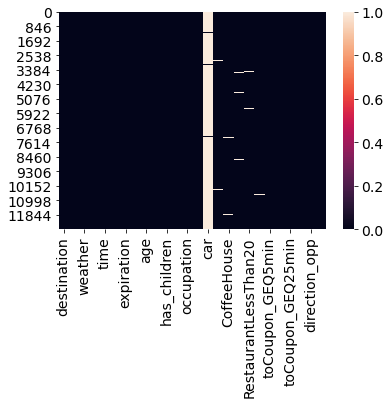

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.isna().sum()  # просматриваем пропуски

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [14]:
for cat_colname in df[['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].columns:
    print(str(cat_colname) + ': (nan='+ str(df[cat_colname].isna().sum()) + ')\n\n' + str(df[cat_colname].value_counts()) +
          '\n' + '*' * 100 + '\n')

car: (nan=12576)

Mazda5                                      22
Scooter and motorcycle                      22
do not drive                                22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64
****************************************************************************************************

Bar: (nan=107)

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64
****************************************************************************************************

CoffeeHouse: (nan=217)

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64
****************************************************************************************************

CarryAway: (nan=151)

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64
***********************************************************

<br>__Пропуски есть в следующих признаках__:
- __car__: 12576
- __Bar__: 107
- __CoffeeHouse__: 217
- __CarryAway__: 151
- __RestaurantLessThan20__: 130
- __Restaurant20To50__: 189


1. Поле __car__ практически не заполнено, 12576 из 12684 позиций (заполнено только 108 позиций). __Исключаем его из датафрейма__.
2. Для остальных полей заменяем значение __nan__ на наиболее часто встречающееся значение:
    - __Bar__: заменияем значением __never__
    - __CoffeeHouse__: заменияем значением __less1__
    - __CarryAway__: заменияем значением __1~3__
    - __RestaurantLessThan20__: заменияем значением __1~3__
    - __Restaurant20To50__: заменияем значением __less1__

In [15]:
12684-12576

108

In [16]:
# Удаляем поле car из набора как неинформативное
df.drop('car', axis=1, inplace=True)

In [17]:
# Заполним пропуски
col = 'Bar'
df[col] = df[col].fillna('never')
# print(df[col].value_counts())

In [18]:
col = 'CoffeeHouse'
df[col] = df[col].fillna('less1')
# print(df[col].value_counts())

In [19]:
col = 'CarryAway'
df[col] = df[col].fillna('1~3')
# print(df[col].value_counts())

In [20]:
col = 'RestaurantLessThan20'
df[col] = df[col].fillna('1~3')
# print(df[col].value_counts())

In [21]:
col = 'Restaurant20To50'
df[col] = df[col].fillna('less1')
# print(df[col].value_counts())

In [22]:
df.isna().sum()  # просматриваем пропуски

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### 2. Обзор целевой переменной

In [23]:
# Checking unique object data
object_cols = [col for col in df.columns if (col == "Y")] # (col == "treatment") | (col == "target")]
for obj in object_cols:
    print(f'\n{obj}')
    for unique in df[obj].unique():
        print(f'- {unique} {sum(df[obj] == unique)}')


Y
- 1 7210
- 0 5474


In [24]:
df.iloc[:, -1].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

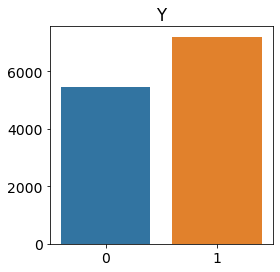

In [25]:
counts = df['Y'].value_counts()  # Количество различных значений признака 'Y'
# print(counts)

plt.figure(figsize=(4,4))    
plt.title('Y')
sns.barplot(counts.index, counts.values)
    
plt.show()

### 3. Обзор числовых  признаков

array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'has_children'}>,
        <AxesSubplot:title={'center':'toCoupon_GEQ5min'}>],
       [<AxesSubplot:title={'center':'toCoupon_GEQ15min'}>,
        <AxesSubplot:title={'center':'toCoupon_GEQ25min'}>,
        <AxesSubplot:title={'center':'direction_same'}>],
       [<AxesSubplot:title={'center':'direction_opp'}>,
        <AxesSubplot:title={'center':'Y'}>, <AxesSubplot:>]], dtype=object)

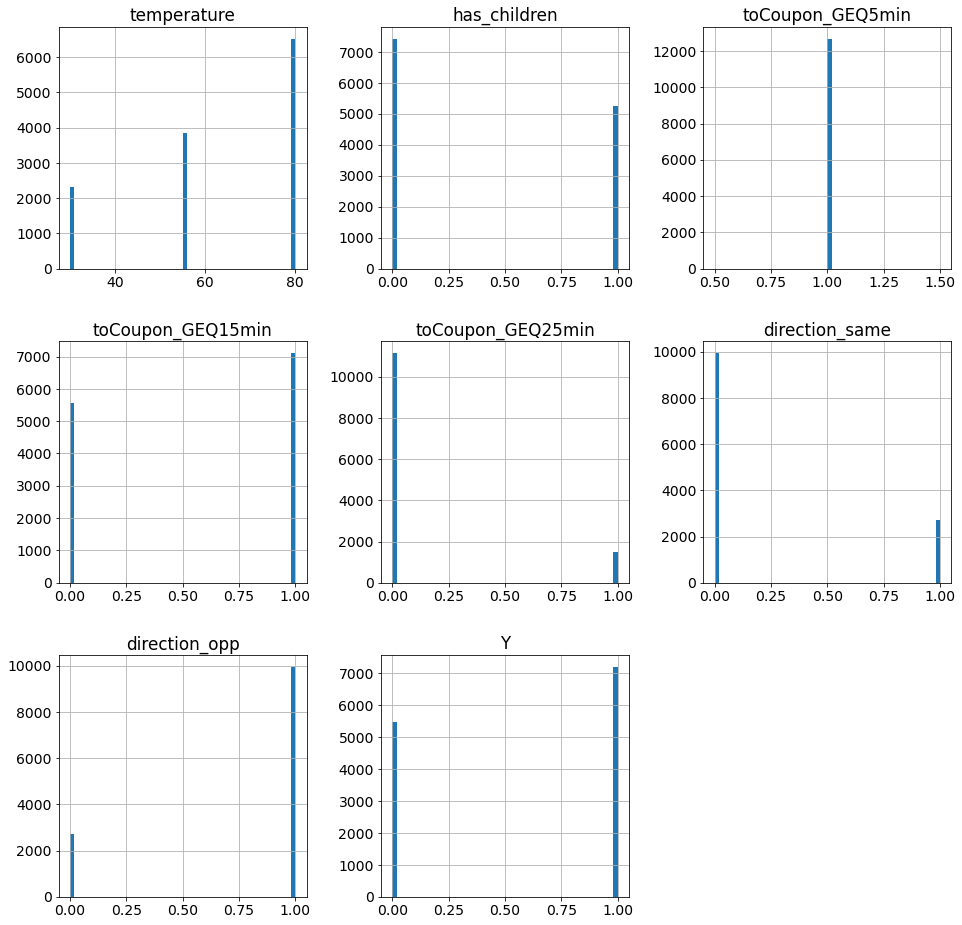

In [26]:
df_num_features = df.select_dtypes(include=['float32', 'float64', 'int8', 'int16', 'int32', 'int64'])

df_num_features.hist(figsize=(16, 16), bins=50, grid=True)

__Поле 'toCoupon_GEQ5min' имеет только одно значение 1 для всех позиций. Исключаем его из нашего датафрэйма.__

In [27]:
df['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [28]:
# Удаляем поле toCoupon_GEQ5min из набора данных как неинформативное
df.drop('toCoupon_GEQ5min', axis=1, inplace=True)

In [29]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [30]:
#df['destination'].value_counts()

In [31]:
# for cat_colname in df.select_dtypes(include='int64').columns:
#     print(str(cat_colname) + '\n\n' + str(df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')
    
for cat_colname in df.select_dtypes(include='int64').columns:
    print(str(cat_colname) + ': (nan='+ str(df[cat_colname].isna().sum()) + ')\n\n' + str(df[cat_colname].value_counts()) +
          '\n' + '*' * 100 + '\n')

temperature: (nan=0)

80    6528
55    3840
30    2316
Name: temperature, dtype: int64
****************************************************************************************************

has_children: (nan=0)

0    7431
1    5253
Name: has_children, dtype: int64
****************************************************************************************************

toCoupon_GEQ15min: (nan=0)

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64
****************************************************************************************************

toCoupon_GEQ25min: (nan=0)

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64
****************************************************************************************************

direction_same: (nan=0)

0    9960
1    2724
Name: direction_same, dtype: int64
****************************************************************************************************

direction_opp: (nan=0)

1    9960
0    2724
Name: direction_opp, dtype: i

### 4. Обзор категориальных признаков

In [32]:
# Checking for object data
df.describe(include=np.object).T

,count,unique,top,freq
destination,12684,3,No Urgent Place,6283
passanger,12684,4,Alone,7305
weather,12684,3,Sunny,10069
time,12684,5,6PM,3230
coupon,12684,5,Coffee House,3996
expiration,12684,2,1d,7091
gender,12684,2,Female,6511
age,12684,8,21,2653
maritalStatus,12684,5,Married partner,5100
education,12684,6,Some college - no degree,4351


In [33]:
# # Checking unique object data
# object_cols = [col for col in df.columns if df[col].dtype == "object"]
# for obj in object_cols:
#     print(f'\n{obj}')
#     for unique in df[obj].unique():
#         print(f'- {unique} {sum(df[obj] == unique)}')

In [34]:
for cat_colname in df.select_dtypes(include='object').columns:
    print(str(cat_colname) + ': (nan='+ str(df[cat_colname].isna().sum()) + ')\n\n' + str(df[cat_colname].value_counts()) +
          '\n' + '*' * 100 + '\n')

destination: (nan=0)

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
****************************************************************************************************

passanger: (nan=0)

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
****************************************************************************************************

weather: (nan=0)

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
****************************************************************************************************

time: (nan=0)

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
****************************************************************************************************

coupon: (nan=0)

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(

# 2 Задание

сделать __feature engineering__

#### Обработка категориальных признаков

In [35]:
# Приводим поле treatment к бинарному виду (1 или 0, т.е было какое-то предложение или нет)
# df.treatment = df_model.treatment.map({'No Offer': 0, 'Buy One Get One': 1, 'Discount': 1})

In [36]:
col_names = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']

cat_col_names = ['destination', 'passanger', 'weather', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


col_names = ['temperature', 'has_children',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']

In [37]:
# One-Hot Encoding:
df = pd.get_dummies(df)

In [38]:
# for col in df.columns:
#     print(col)

In [39]:
# Переименуем поля:
# passanger_Friend(s) -> passanger_Friend
df = df.rename(columns={'passanger_Friend(s)': 'passanger_Friend'})
# passanger_Kid(s) -> passanger_Kid
df = df.rename(columns={'passanger_Kid(s)': 'passanger_Kid'})
# coupon_Restaurant(20-50) -> coupon_Restaurant_20_50
df = df.rename(columns={'coupon_Restaurant(20-50)': 'coupon_Restaurant_20_50'})
# coupon_Restaurant(<20) -> coupon_Restaurant_less_20
df = df.rename(columns={'coupon_Restaurant(<20)': 'coupon_Restaurant_less_20'})

In [40]:
df.head()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,80,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,80,1,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,80,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,80,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [41]:
df[col_names].head(3)

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,55,1,0,0,0,1
1,80,1,0,0,0,1
2,80,1,1,0,0,1


# 3 Задание

обучить любой классификатор (какой вам нравится)

Разбиваем выборку на тренировочную и тестовую части и обучаем модель (градиентный бустинг)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
#разделим данные на train/test
x_data = df.drop('Y', axis=1)
y_data = df['Y']

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [44]:
# for col in X_train.columns:
#     print(col)

In [45]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

[00:03:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Проверяем качество

In [46]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 
    
    return f1, roc, rec, prc

In [47]:
models_results = {
    'model': [],
    'f-score': [],
    'roc': [],
    'recall': [],
    'precision': [],
    'positives_marked %': []
}

In [48]:
from math import nan
positives_marked = nan

f1, roc, rec, prc = evaluate_results(y_test, y_predict)

models_results['model'].append('XGBClassifier')
models_results['f-score'].append(f1)
models_results['roc'].append(roc)
models_results['recall'].append(rec)
models_results['precision'].append(prc)
models_results['positives_marked %'].append(positives_marked)

Classification results:
f1: 80.62%
roc: 76.19%
recall: 83.15%
precision: 78.23%


In [49]:
# y_predict.value_counts()  # Количество различных значений признака 'Y'
# type(y_predict)
# np.unique(y_predict)
# y_predict

In [50]:
import itertools

X = y_predict
num = [(x, len(list(y))) for x, y in itertools.groupby(sorted(X))]
print(num)

[(0, 998), (1, 1539)]


In [51]:
# from itertools import groupby

# things = [("animal", "bear"), ("animal", "duck"), ("plant", "cactus"), ("vehicle", "speed boat"), ("vehicle", "school bus")]

# for key, group in groupby(things, lambda x: x[0]):
#     for thing in group:
#         print("A %s is a %s." % (thing[1], key))
#     print("")

# for key, group in groupby(things, lambda x: x[0]):
#     listOfThings = " and ".join([thing[1] for thing in group])
#     print(key + "s:  " + listOfThings + ".")

# 4 Задание

далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть

### Positive Unlabeled Learning (задача lookalike)

Представим, что нам неизвестны негативы и часть позитивов

In [52]:
mod_data = df.copy()
mod_data.head(3)

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,80,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,80,1,1,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [53]:
mod_data.iloc[:,-1].values
# mod_data['Y'].values

#get the indices of the positives samples
pos_ind = np.where(mod_data['Y'].values == 1)[0]
# pos_ind

# Y
# - 1 7210
# - 0 5474

In [119]:
# shuffle
# тасовать (shuffle, make, riffle)
# перемешивать (mix, jumble, agitate, medley, shuffle, intermix)
# изворачиваться (dodge, shift, shuffle)Using 1803/7210 as positives and unlabeling the rest

#shuffle them
np.random.shuffle(pos_ind)

positives_marked = 0.25  # leave just 25% of the positives marked
# positives_marked = 0.35  # leave just 35% of the positives marked
# positives_marked = 0.45  # leave just 45% of the positives marked
# positives_marked = 0.15  # leave just 15% of the positives marked
# positives_marked = 0.05  # leave just 5% of the positives marked
# positives_marked = 0.20  # leave just 20% of the positives marked
# positives_marked = 0.10  # leave just 10% of the positives marked
# positives_marked = 0.135  # leave just 13.5% of the positives marked
# positives_marked = 0.55  # leave just 55% of the positives marked

# pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))
pos_sample_len = int(np.ceil(positives_marked * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

# Использование 1803/7210 в качестве положительных результатов и снятие маркировки с остальных

Using 3966/7210 as positives and unlabeling the rest


Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [120]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())
# mod_data['class_test'].head(3)

target variable:
 -1    8718
 1    3966
Name: class_test, dtype: int64


* We now have just 1803 positive samples labeled as 1 in the 'class_test' col while the rest is unlabeled as -1.

* Recall that col 'Y' still holds the actual label

Remember that this data frame (x_data) includes the former target variable that we keep here just to compare the results

[:-2] is the original class label for positive and negative data [:-1] is the new class for positive and unlabeled data

In [121]:
x_data = mod_data.drop(['Y', 'class_test'], axis=1) # just the X 
# x_data.head(3)
y_labeled = mod_data['Y'].values # new class (just the P & U)
# y_labeled[:3]
y_positive = mod_data['class_test'].values # original class
# y_positive[:3]

# 5 Задание

применить random negative sampling для построения классификатора в новых условиях

### 1. random negative sampling

In [122]:
mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)
# sample_train.head(3)
# sample_train.iloc[:,-2].values
# sample_test.iloc[:,:-2].values

(3966, 110) (3966, 110)


In [123]:
model = xgb.XGBClassifier()

# model.fit(sample_train.iloc[:,:-2].values, 
#           sample_train.iloc[:,-2].values)
# y_predict = model.predict(sample_test.iloc[:,:-2].values)
# evaluate_results(sample_test.iloc[:,-2].values, y_predict)

model.fit(sample_train.drop(['Y', 'class_test'], axis=1).values, 
          sample_train['Y'].values)
y_predict = model.predict(sample_test.drop(['Y', 'class_test'], axis=1).values)
# evaluate_results(sample_test['Y'].values, y_predict)

[00:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [124]:
f1, roc, rec, prc = evaluate_results(sample_test['Y'].values, y_predict)

models_results['model'].append('random negative sampling')
models_results['f-score'].append(f1)
models_results['roc'].append(roc)
models_results['recall'].append(rec)
models_results['precision'].append(prc)
models_results['positives_marked %'].append(positives_marked)
print(f'positives_marked: {positives_marked *100}%')

Classification results:
f1: 67.19%
roc: 71.41%
recall: 88.77%
precision: 54.05%
positives_marked: 55.00000000000001%


# 6 Задание

сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)

Пункт 3:<br>
Classification results:
- f1: 80.62%
- roc: 76.19%
- recall: 83.15%
- precision: 78.23%

Пункт 5:<br>
- Classification results:
- f1: 73.039%
- roc: 66.70%
- recall: 91.83%
- precision: 60.63%
- positives_marked: 25.0%

In [60]:
pd.DataFrame(data=models_results).sort_values('f-score', ascending=False)

,model,f-score,roc,recall,precision,positives_marked %
0,XGBClassifier,0.806160,0.761935,0.831492,0.782326,NaN
1,random negative sampling,0.730395,0.667010,0.918317,0.606319,0.25


# 7 Задание

поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

In [125]:
pd.DataFrame(data=models_results).sort_values('precision', ascending=False)

,model,f-score,roc,recall,precision,positives_marked %
0,XGBClassifier,0.806160,0.761935,0.831492,0.782326,NaN
7,random negative sampling,0.738669,0.624145,0.912424,0.620505,0.100
8,random negative sampling,0.737561,0.634857,0.918493,0.616181,0.135
4,random negative sampling,0.737536,0.640923,0.918592,0.616102,0.150
6,random negative sampling,0.735405,0.655582,0.917314,0.613703,0.200
1,random negative sampling,0.730395,0.667010,0.918317,0.606319,0.250
5,random negative sampling,0.730737,0.586320,0.921513,0.605404,0.050
2,random negative sampling,0.717573,0.688216,0.901388,0.596028,0.350
3,random negative sampling,0.708439,0.713611,0.908050,0.580771,0.450
9,random negative sampling,0.671859,0.714138,0.887653,0.540467,0.550


In [126]:
pd.DataFrame(data=models_results).sort_values('roc', ascending=False)

,model,f-score,roc,recall,precision,positives_marked %
0,XGBClassifier,0.806160,0.761935,0.831492,0.782326,NaN
9,random negative sampling,0.671859,0.714138,0.887653,0.540467,0.550
3,random negative sampling,0.708439,0.713611,0.908050,0.580771,0.450
2,random negative sampling,0.717573,0.688216,0.901388,0.596028,0.350
1,random negative sampling,0.730395,0.667010,0.918317,0.606319,0.250
6,random negative sampling,0.735405,0.655582,0.917314,0.613703,0.200
4,random negative sampling,0.737536,0.640923,0.918592,0.616102,0.150
8,random negative sampling,0.737561,0.634857,0.918493,0.616181,0.135
7,random negative sampling,0.738669,0.624145,0.912424,0.620505,0.100
5,random negative sampling,0.730737,0.586320,0.921513,0.605404,0.050
